### Problem statement

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [21]:
# Reading the data
column_names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('Dataset.txt',header=None, names=column_names)
print("Data loaded successfully")

Data loaded successfully


### Importing the dependencies

In [102]:
# For data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

# For data processing and model training
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Exploratory data analysis

In [4]:
# Checking the shape of the dataframe
print("Shape of dataframe : ",df.shape)

Shape of dataframe :  (4177, 9)


In [5]:
# Checking any 5 random rows from the dataframe
df.sample(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
954,M,0.490,0.385,0.125,0.649,0.320,0.1240,0.1695,8
2741,I,0.460,0.350,0.100,0.471,0.252,0.0770,0.1230,8
2082,F,0.665,0.525,0.210,1.644,0.818,0.3395,0.4275,10
2848,F,0.625,0.485,0.160,1.254,0.591,0.2590,0.3485,9


In [6]:
# Checking the column info in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# Descriptive analysis
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


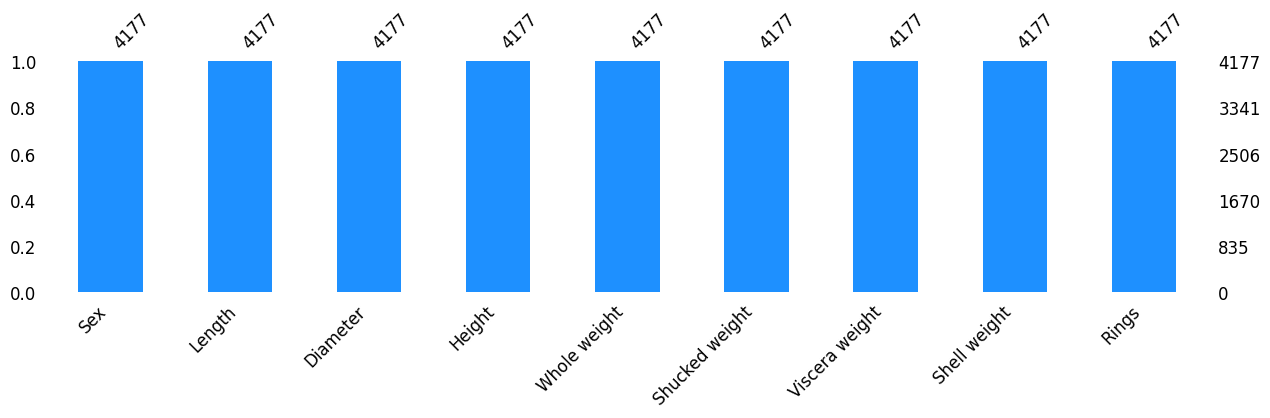

Total duplicate values :  0


In [8]:
# Checking any null values or duplicate values
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

print("Total duplicate values : ",df.duplicated().sum())

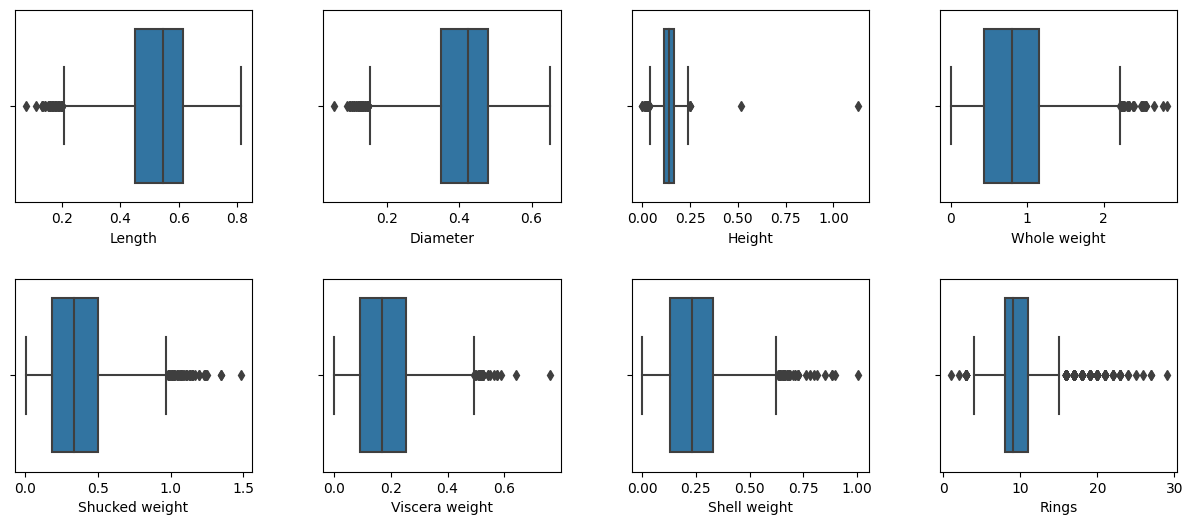

In [9]:
# Let's visualize if there are any outliers
fig,ax = plt.subplots(2,4,figsize = (15,6))

sns.boxplot(x = df['Length'], ax = ax[0][0])
sns.boxplot(x = df['Diameter'], ax = ax[0][1])
sns.boxplot(x = df['Height'], ax = ax[0][2])
sns.boxplot(x = df['Whole weight'], ax = ax[0][3])

sns.boxplot(x = df['Shucked weight'], ax = ax[1][0])
sns.boxplot(x = df['Viscera weight'], ax = ax[1][1])
sns.boxplot(x = df['Shell weight'], ax = ax[1][2])
sns.boxplot(x = df['Rings'], ax = ax[1][3])

plt.subplots_adjust(wspace = 0.3,hspace = 0.4)
plt.show()

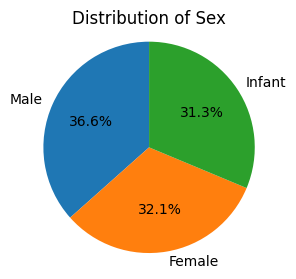

In [16]:
# Assuming df is your DataFrame containing the 'Sex' column
sex_counts = df['Sex'].value_counts()
labels = ['Male','Female','Infant']
sizes = sex_counts.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

plt.figure(figsize=(3,3))
plt.pie(percentages, labels=labels, autopct='%.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Sex')
plt.show()

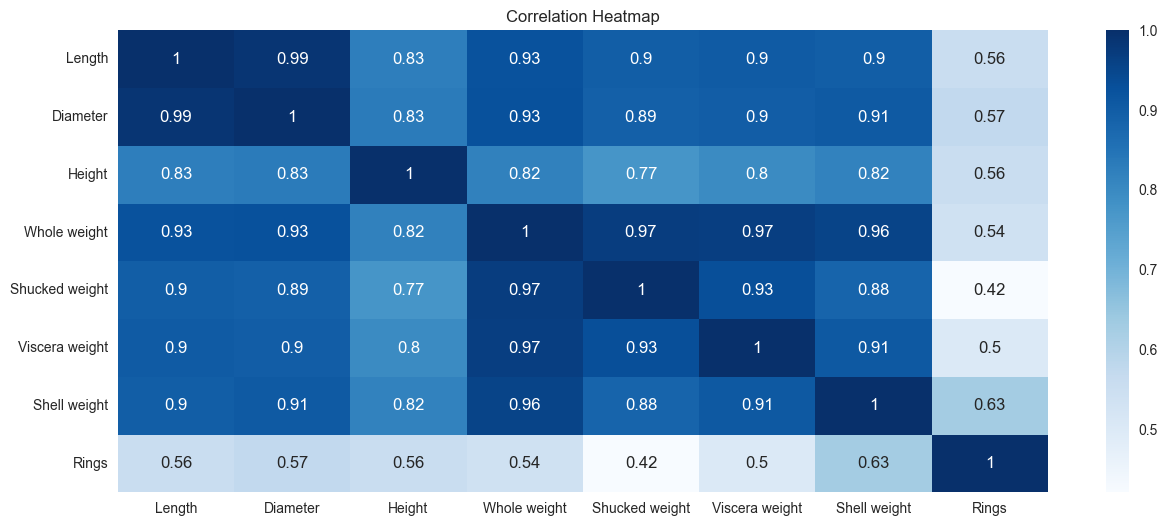

In [39]:
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="Blues")

plt.title('Correlation Heatmap')
plt.show()

## Data processing

In [86]:
# Seperating the data in dependent and independent variables
X = df.drop(['Sex'],axis=1)
y = df['Sex']

# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)

In [87]:
# Scaling the values
scaling = ColumnTransformer(transformers = [
    ('Stand_scaling',StandardScaler(),[0,1,2,3,4,5,6,7])
],remainder='passthrough')

# Building a pipeline
pipe = Pipeline(steps = [
    ('Scaling',scaling)
])

In [88]:
# Process the data using pipeline
X_train = pipe.fit_transform(X_train,y_train)
X_test = pipe.transform(X_test)

# Instantiating label encoder class
Le = LabelEncoder()

y_train = Le.fit_transform(y_train)
y_test = Le.transform(y_test)

### Model training

In [89]:
Input = df.drop(['Sex'],axis = 1)
Output = df['Sex']
Output = Le.transform(Output)

Input = pipe.transform(Input)

In [90]:
pycaret_set = setup(data = Input,target = Output,train_size = 0.8,preprocess=False)

,Description,Value
0,Session id,4250
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 9)"
5,Transformed train set shape,"(3341, 9)"
6,Transformed test set shape,"(836, 9)"
7,Numeric features,8


In [91]:
# Let's get the best model
best_model = compare_models(fold=5, cross_validation=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5567,0.7592,0.5567,0.5431,0.5430,0.3320,0.3359,0.6020
gbc,Gradient Boosting Classifier,0.5528,0.7500,0.5528,0.5456,0.5456,0.3254,0.3275,1.2440
lda,Linear Discriminant Analysis,0.5474,0.7490,0.5474,0.5425,0.5387,0.3163,0.3198,0.5120
ridge,Ridge Classifier,0.5429,0.0000,0.5429,0.5272,0.5261,0.3127,0.3178,0.5120
rf,Random Forest Classifier,0.5397,0.7408,0.5397,0.5323,0.5346,0.3076,0.3084,0.7460
ada,Ada Boost Classifier,0.5343,0.7238,0.5343,0.5234,0.5202,0.2981,0.3027,0.6260
svm,SVM - Linear Kernel,0.5334,0.0000,0.5334,0.5127,0.4850,0.2944,0.3139,0.5160
lightgbm,Light Gradient Boosting Machine,0.5334,0.7350,0.5334,0.5273,0.5295,0.2979,0.2983,0.6760
qda,Quadratic Discriminant Analysis,0.5331,0.7404,0.5331,0.5216,0.5036,0.2975,0.3101,0.5160
et,Extra Trees Classifier,0.5313,0.7368,0.5313,0.5234,0.5259,0.2949,0.2957,0.7440


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [94]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [95]:
# Training the model
best_model.fit(X_train,y_train)

# Model predictions
y_pred = best_model.predict(X_test)

In [99]:
scores = cross_val_score(estimator = best_model, X = X_train, y = y_train, cv=50)
print("Average Score",np.mean(scores))

Average Score 0.5554816824966078


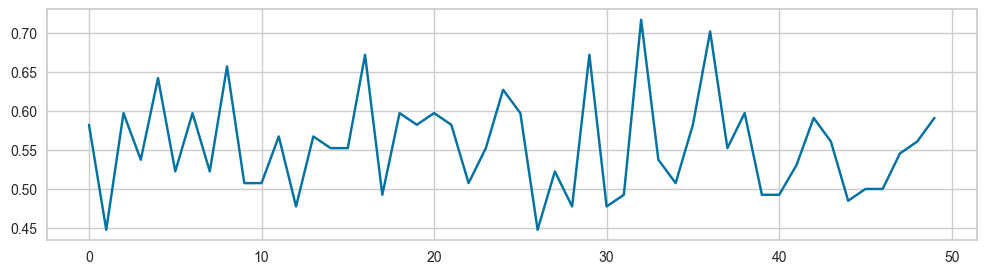

In [101]:
# Create a figure and axis
plt.figure(figsize=(12, 3))
plt.plot(scores)

In [105]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision (set average parameter appropriately)
precision = precision_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None

# Calculate recall (set average parameter appropriately)
recall = recall_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None

# Calculate F1 score (set average parameter appropriately)
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', 'weighted', or None

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.57
Precision: 0.56
Recall: 0.57
F1 Score: 0.55
